In [55]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['axes.grid'] = True

# On practical IIR filters
Consider a signal $x(t) = sin(2\pi f_1 t)$ with $f_1 = 2Hz$. Only the signal is contaminated with high frequency noise $n(t)$. We're measuring $y(t) = x(t) + n(t)$.

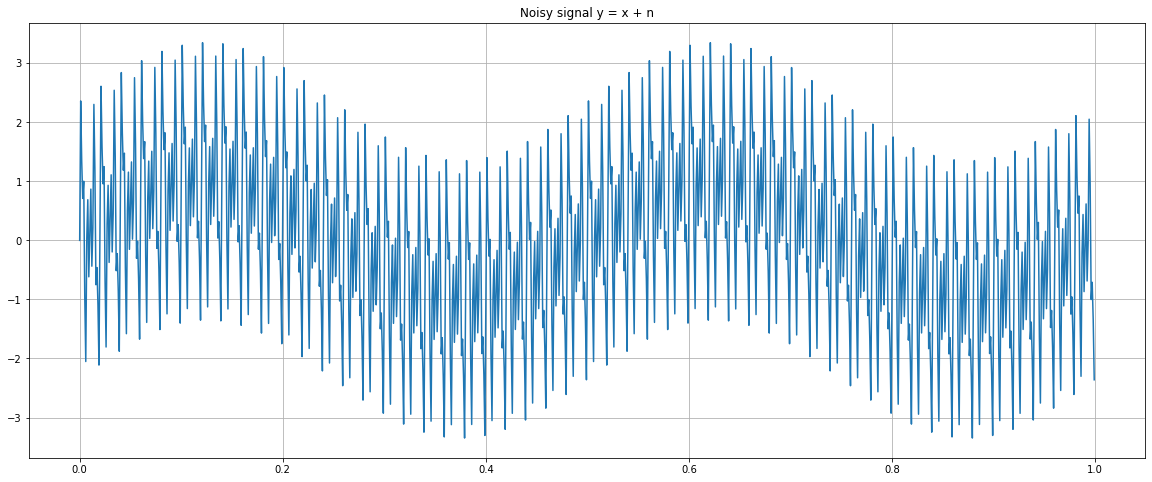

In [3]:
fs = 1000
f_1 = 2
f_noise = [100, 150, 300]
t = np.arange(0, 1, 1/fs)
x = np.sin(2*np.pi*f_1*t)
n = [np.sin(2*np.pi*f*t) for f in f_noise]
y = x + n[0] + n[1] + n[2]
plt.plot(t, y)
plt.title("Noisy signal y = x + n")
plt.show()

We can use scipy.signal to design a low pass filter to try to obtain an estimate $z$ of the original signal $x$. Let's remove signals above $5 Hz$

In [16]:
nyq = fs / 2
f_cutoff = 5
b,a = signal.iirfilter(2, f_cutoff / nyq, btype='low',
                       analog=False,
                       output='ba')
z = signal.lfilter(b, a, y)
# z = signal.lfilt(filt, y)

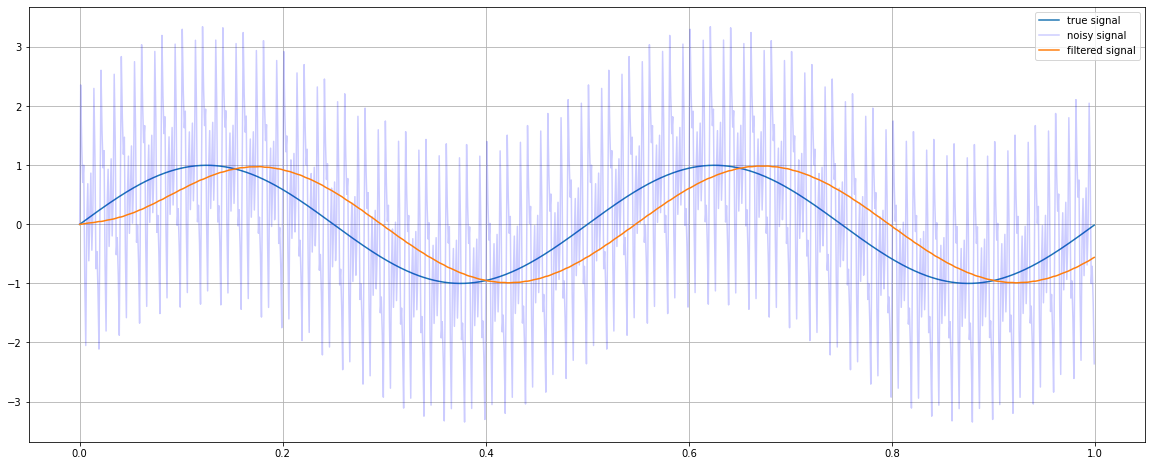

In [17]:
plt.plot(t, x, label="true signal");
plt.plot(t, y, c=(0,0,1,0.2), label="noisy signal");
plt.plot(t, z, label="filtered signal")
plt.legend()
plt.show()

That worked pretty well, only the resulting signal is delayed in time.

In [52]:
# manually find the delay between the signals
np.where(z < -0.95)[0][0] - np.where(x < -0.95)[0][0]

51

This delay is called the group delay. It is a property of this particular filter. Moreover the groupdelay is a spectrum. It depends on the frequency of the signal. Let's check it out

filtered signal is delayed by ~51.2 samples


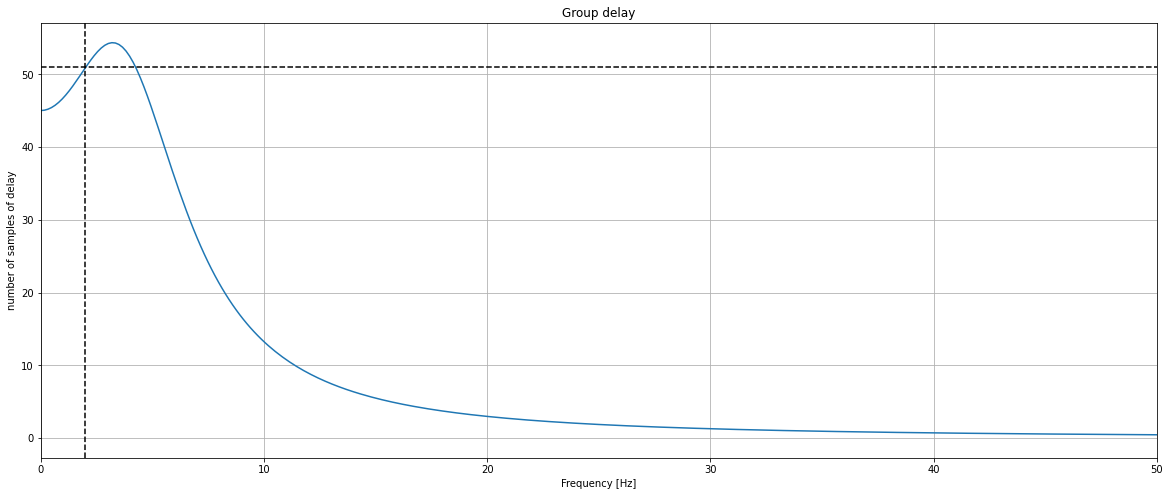

In [51]:
# create frequency bins to evaluate our filter on
w_step = 0.001
w = np.arange(0, np.pi, w_step)
w, gd = signal.group_delay((b,a), w)
i = round(f_1 / nyq * np.pi / w_step)
print("filtered signal is delayed by ~{:-.1F} samples".format(gd[i]))

plt.plot(w / np.pi * nyq, gd)
plt.plot(51 * np.ones(len(w)), "--k")
plt.axvline(x = 2, color = "black", linestyle='dashed') 
plt.xlim([0, 50])
plt.title("Group delay")
plt.ylabel("number of samples of delay")
plt.xlabel("Frequency [Hz]")
plt.show()